<a href="https://colab.research.google.com/github/ayman-metwally2020/Anomaly-Detection-/blob/main/anomaly_detection_parts_3_4_exercises_with_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANOMALY DETECTION DAY 2/ANOMALY DETECTION PART 3 EXERCISE ANSWERS ##
#### Exercise 1 ####
#### Task 1
##### Import the required packages
##### Set the working directory to data directory
##### Print the working directory and the plot directory
#### Result:


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
# Set 'main_dir' to location of the project folder
from pathlib import Path
home_dir = Path(".").resolve()
main_dir = home_dir.parent
print(main_dir)
data_dir = str(main_dir) + "/content/data"
print(data_dir)


/
//content/data


#### Task 2
##### Read in `seismic-hazards.csv` to a new dataframe `hazard`.
##### Read the documentation to understand the variables https://archive.ics.uci.edu/ml/datasets/seismic-bumps#
##### Explore the dataset by printing its head, info and shape.
#### Result:


In [4]:
hazard = pd.read_csv(str(data_dir)+'/seismic-hazard.csv')
hazard.head()
hazard.shape
hazard.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2584 non-null   int64 
 1   seismic         2584 non-null   object
 2   seismoacoustic  2584 non-null   object
 3   shift           2584 non-null   object
 4   genergy         2584 non-null   int64 
 5   gpuls           2584 non-null   int64 
 6   gdenergy        2584 non-null   int64 
 7   gdpuls          2584 non-null   int64 
 8   ghazard         2584 non-null   object
 9   nbumps          2584 non-null   int64 
 10  nbumps2         2584 non-null   int64 
 11  nbumps3         2584 non-null   int64 
 12  nbumps4         2584 non-null   int64 
 13  nbumps5         2584 non-null   int64 
 14  nbumps6         2584 non-null   int64 
 15  nbumps7         2584 non-null   int64 
 16  nbumps89        2584 non-null   int64 
 17  energy          2584 non-null   int64 
 18  maxenerg

#### Task 3
##### Drop all the non-numerical and id columns - `['seismic','seismoacoustic','shift','ghazard','id']`
##### Save this subset as `hazard_sub` and print its head.
#### Result:


In [5]:
hazard_sub = hazard.drop(['seismic','seismoacoustic','shift','ghazard','id'], axis = 1)
hazard_sub.head()
hazard_sub['class'].value_counts()


,count
class,
0,2414
1,170


#### Task 4
##### Split the subset to train and test.
##### Now split the train dataset to `hazard` (class `1`) which has all outlier data and `non_hazard` (class `0`) which has all regular observations.
##### Drop `class` variable from `non_hazard` dataframe.
##### Append test dataset with `hazard`. Save the `class` variable from test as `actual_test`
#### Result:


In [6]:
train, test = train_test_split(hazard_sub, test_size=.30)
# Split hazard vs non hazard.
non_hazard = train[train['class']==0]
hazard = train[train['class']==1]
non_hazard = non_hazard.drop(['class'], axis = 1)
test = pd.concat([test, hazard], ignore_index=True)
actual_test = test['class']


#### Task 5
##### Instantiate a LOF with `n_neighbors` set to `5`, `contamination = 0.1` and `novelty = True` to `non_hazard`
##### Fit the model with `non_hazard` data.
##### Predict on hazard `test` and print first 5 predictions.
#### Result:


In [7]:
lof = LocalOutlierFactor(n_neighbors = 5, metric = "manhattan", contamination = 0.1, novelty = True)
# model fitting
lof.fit(non_hazard)
hazard_pred = lof.predict(test.iloc[:,:-1])
hazard_pred[:5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1])

#### Task 6
##### Map the values to `0` for non-anomalies and `1` for anomalies.
##### Evalulate the model by finding the TPR and TNR
#### Result:


In [8]:
hazard_pred[hazard_pred == 1] = 0
hazard_pred[hazard_pred == -1] = 1
tn, fp, fn, tp = confusion_matrix(actual_test, hazard_pred).ravel()
non_hazard_eval = tn / (tn + fp)
print(non_hazard_eval)
hazard_eval = tp / (tp + fn)
print(hazard_eval)


0.8969359331476323
0.15294117647058825


#### Exercise 2 ####
#### Task 1
##### Tune the neighborhood size and find the optimal n_neighbors parameter for the LOF model  
##### Plot the TPR and TNR for the range of neighborhood sizes used
##### Find the optimal n_neighbor parameter from the plot
#### Result:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid

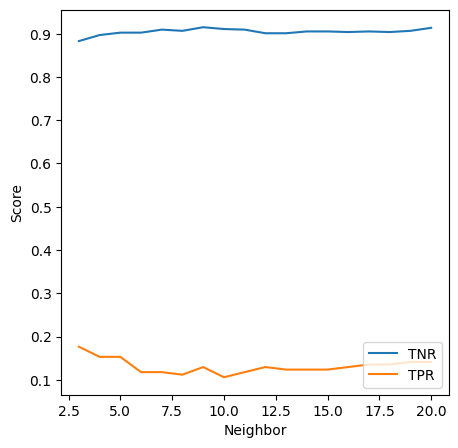

In [9]:
lof_df = pd.DataFrame()
for neighbor in range(3,21):
    lof = LocalOutlierFactor(n_neighbors = neighbor, metric = "manhattan", novelty = True)
    lof.fit(non_hazard)
    hazard_pred = lof.predict(test.iloc[:,:-1])
    hazard_pred[hazard_pred == 1] = 0
    hazard_pred[hazard_pred == -1] = 1
    tn, fp, fn, tp = confusion_matrix(actual_test, hazard_pred).ravel()
    non_hazard_eval = tn / (tn + fp)
    hazard_eval = tp / (tp + fn)
    values  =  [neighbor,non_hazard_eval,hazard_eval]
    values = pd.DataFrame(values).T
    lof_df = pd.concat([lof_df,values])
lof_df.columns=['Neighbor','TNR','TPR']
plt.figure(figsize=(5,5))
plt.plot(lof_df['Neighbor'],lof_df['TNR'], label = 'TNR')
plt.plot(lof_df['Neighbor'],lof_df['TPR'], label = 'TPR')
plt.xlabel('Neighbor')
plt.ylabel('Score')
plt.legend(loc="lower right")
plt.show()
#We see that TPR and TNR are high around 3 neighbors.


#### Task 2
##### Tune the contamination and find the optimal contamination parameter for the LOF model.
##### Plot the TPR and TNR for the all the contamination values used.
##### Find the optimal contamination parameter from the plot.
#### Result:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid

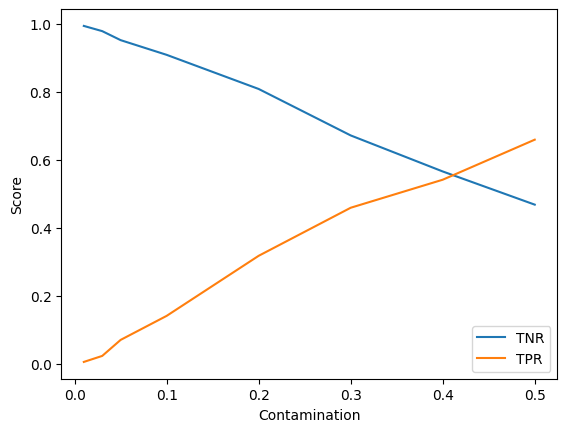

In [10]:
contamination_values = [0.01,0.03,0.05,0.1,0.2,0.3,0.4,0.5]
lof_df = pd.DataFrame()
for contamination_value in contamination_values:
    lof = LocalOutlierFactor(n_neighbors = 20, metric = "manhattan",contamination = contamination_value, novelty = True)
    lof.fit(non_hazard)
    hazard_pred = lof.predict(test.iloc[:,:-1])
    hazard_pred[hazard_pred == 1] = 0
    hazard_pred[hazard_pred == -1] = 1
    tn, fp, fn, tp = confusion_matrix(actual_test, hazard_pred).ravel()
    non_hazard_eval = tn / (tn + fp)
    hazard_eval = tp / (tp + fn)
    values  =  [contamination_value,non_hazard_eval,hazard_eval]
    values = pd.DataFrame(values).T
    lof_df = pd.concat([lof_df,values])
lof_df.columns=['Contamination','TNR','TPR']
plt.plot(lof_df['Contamination'],lof_df['TNR'], label = 'TNR')
plt.plot(lof_df['Contamination'],lof_df['TPR'], label = 'TPR')
plt.xlabel('Contamination')
plt.ylabel('Score')
plt.legend(loc="lower right")
plt.show()
#We see that both TPR and TNR are high around 0.2.


#### Task 3
##### Fit the LOF model with the optimal parameters
##### Evaluate this model by finding the TPR and TNR on hazard test dataset
##### Load the `ex_performance_anomalies.sav` pickle file from the data folder and the scores of the LOF model
#### Result:


In [17]:
lof = LocalOutlierFactor(n_neighbors = 3, metric = "manhattan", contamination = 0.2, novelty = True)
# model fitting
lof.fit(non_hazard)
hazard_pred = lof.predict(test.iloc[:,:-1])
hazard_pred[hazard_pred == 1] = 0
hazard_pred[hazard_pred == -1] = 1
tn, fp, fn, tp = confusion_matrix(actual_test, hazard_pred).ravel()
non_hazard_eval = tn / (tn + fp)
print(non_hazard_eval)
hazard_eval = tp / (tp + fn)
print(hazard_eval)
performance_df_ex = pickle.load(open(str(data_dir) + '/performance_anomalies.sav',"rb"))
s = pd.Series(['LOF', hazard_eval, non_hazard_eval], index=['model_name', 'TPR', 'TNR'])
performance_df_ex = pd.concat([performance_df_ex, s], ignore_index=True)
performance_df_ex


0.8036211699164345
0.27058823529411763


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


,model_name,TPR,TNR,0
0,Decision_tree_baseline,0.671642,0.999667,NaN
1,SMOTE,0.850746,0.992499,NaN
2,NaN,NaN,NaN,LOF
3,NaN,NaN,NaN,0.740909
4,NaN,NaN,NaN,0.901284
5,NaN,NaN,NaN,LOF
6,NaN,NaN,NaN,0.270588
7,NaN,NaN,NaN,0.803621


#### Task 4
##### Save `performance_df_ex`, `non_hazard`, `test` and `actual_test` as pickle files `ex_performance_anomalies.sav`, `non_hazard.sav`, `test.sav` and `actual_test.sav` respectively for the following exercises.
#### Result:


In [18]:
pickle.dump(performance_df_ex, open(str(data_dir) + "/ex_performance_anomalies.sav","wb" ))
pickle.dump(non_hazard, open(str(data_dir) + "/non_hazard.sav","wb" ))
pickle.dump(test, open(str(data_dir) + "/test.sav","wb" ))
pickle.dump(actual_test, open(str(data_dir) + "/actual_test.sav","wb" ))


## ANOMALY DETECTION DAY 2/ANOMALY DETECTION PART 4 EXERCISE ANSWERS ##
#### Exercise 3 ####
#### Task 1
##### Import the required packages
##### Set the working directory to data directory
##### Print the working directory and the plot directory
#### Result:


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
# Set 'main_dir' to location of the project folder
from pathlib import Path
home_dir = Path(".").resolve()
main_dir = home_dir.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)


##### Task 2
##### Load pickled files from the previous exercises `ex_performance_anomalies.sav`, `non_hazard.sav`, `test.sav` and `actual_test.sav` as `performance_df_ex`, `non_hazard`, `test` and `actual_test` respectively.
#### Result:


In [ ]:
performance_df_ex = pickle.load(open((str(data_dir) + "/ex_performance_anomalies.sav"),"rb"))
non_hazard = pickle.load(open((str(data_dir) + "/non_hazard.sav"),"rb"))
test = pickle.load(open((str(data_dir) + "/test.sav"),"rb"))
actual_test = pickle.load(open((str(data_dir) + "/actual_test.sav"),"rb"))


#### Task 3
##### Load `PJM_Load_hourly.csv` dataset and print the head. Save as `pjm_load`.
##### Convert `Datatime` variable from type `object` to `datetime`. Check its datatype after type-conversion
##### Filter the data to include values post year 2000
##### Visualize the timeseries data using a lineplot
#### Result:


In [ ]:
pjm_load = pd.read_csv(str(data_dir)+"/PJM_Load_hourly.csv")
pjm_load.head()
pjm_load['Datetime'] = pd.to_datetime(pjm_load['Datetime'])
pjm_load.info()
pjm_load = pjm_load[pjm_load['Datetime'] > '2000-01-01 00:00:00']
pjm_load.plot(x='Datetime', y='PJM_Load_MW', figsize=(17,6))
plt.xlabel('Date time')
plt.ylabel('Energy Consumption')
plt.title('Energy consumption - Load combined (MW) at each hour')
plt.show()


#### Task 4
##### Fit the LOF model with `n_neighbors: 100` , `contamination: 0.01`  and `novelty: False`
##### Predict for anomalies for the variable `PJM_Load_MW` and save the results in the pjm_load dataframe
##### Visualize the detected anomalies
#### Result:


In [ ]:
lof_energy_model = LocalOutlierFactor(n_neighbors = 100, metric = "manhattan", contamination = 0.01, novelty = False)
lof_energy_model.fit(pd.DataFrame(pjm_load['PJM_Load_MW']))
pjm_load['anomaly'] = lof_energy_model.fit_predict(pd.DataFrame(pjm_load['PJM_Load_MW']))
fig, ax = plt.subplots(figsize=(15,5))
a = pjm_load.loc[pjm_load['anomaly'] == -1, ['Datetime', 'PJM_Load_MW']] #anomaly
ax.plot(pjm_load['Datetime'], pjm_load['PJM_Load_MW'], color='blue', label = 'Normal')
ax.scatter(a['Datetime'],a['PJM_Load_MW'], color='red', label = 'Anomaly')
plt.legend()
plt.show()


#### Task 5
##### Create variable `lof_upper_anomalies` that has the upper range of anomalies detected using the 75% quantile threshold
##### Create variable `lof_lower_anomalies` that has the lower range of anomalies detected using the 25% quantile threshold
##### Visualize `lof_upper_anomalies` and `lof_lower_anomalies`
#### Result:


In [ ]:
lower_threshold = pjm_load['PJM_Load_MW'].quantile(0.25)
upper_threshold = pjm_load['PJM_Load_MW'].quantile(0.75)
lof_anomalies = pjm_load[pjm_load['anomaly'] == -1]
# Upper range of anomalies
lof_upper_anomalies = lof_anomalies[lof_anomalies['PJM_Load_MW'] > upper_threshold]['PJM_Load_MW']
# Lower range of anomalies
lof_lower_anomalies = lof_anomalies[lof_anomalies['PJM_Load_MW'] < lower_threshold]['PJM_Load_MW']
plt.rcParams.update({'font.size': 20})
plt.hist(lof_lower_anomalies)
plt.xlabel("Anomaly points")
plt.ylabel("Frequency")
plt.title("Lower range of anomalies")
plt.show()
plt.hist(lof_upper_anomalies)
plt.xlabel("Anomaly points")
plt.ylabel("Frequency")
plt.title("Upper range of anomalies")
plt.show()


#### Exercise 4 ####
#### Task 1
##### Fit an isolation forest with 100 estimators and contamination: 0.1
#### Result:


In [ ]:
iforest = IsolationForest(n_estimators=100, contamination = 0.1)
# model fitting
iforest.fit(non_hazard)


#### Task 2
##### Predict on hazard test data and map the predictions as 0 for non-anomalies and 1 for anomalies
#### Result:


In [ ]:
hazard_pred = iforest.predict(test.iloc[:,:-1])
hazard_pred[:5]
hazard_pred[hazard_pred == 1] = 0
hazard_pred[hazard_pred == -1] = 1


#### Task 3
##### Evaluate the model using TPR and TNR
##### Append the scores to the `performance_df_ex` dataframe
#### Result:


In [ ]:
tn, fp, fn, tp = confusion_matrix(actual_test, hazard_pred).ravel()
non_hazard_eval = tn / (tn + fp)
print(non_hazard_eval)
hazard_eval = tp / (tp + fn)
print(hazard_eval)
s = pd.Series(['Isolation Forest', hazard_eval, non_hazard_eval],
              index=['model_name', 'TPR', 'TNR'])
performance_df_ex = pd.concat([performance_df_ex, s], ignore_index=True)
performance_df_ex


#### Exercise 5 ####
#### Task 1
##### Fit an isolation forest with 100 estimators and contamination: 0.01 on `pjm_load` time series data
##### Predict for anomalies on `PJM_Load_MW` variable and save the results as a column in the pjm_load dataframe
##### Visualize the detected anomalies
#### Result:


In [ ]:
isolation_energy = IsolationForest(n_estimators=100, contamination = 0.01)
# model fitting
isolation_energy.fit(pd.DataFrame(pjm_load['PJM_Load_MW']))
pjm_load['anomaly'] = isolation_energy.predict(pd.DataFrame(pjm_load['PJM_Load_MW']))
# visualization
fig, ax = plt.subplots(figsize=(15,5))
a = pjm_load.loc[pjm_load['anomaly'] == -1, ['Datetime', 'PJM_Load_MW']] #anomaly
ax.plot(pjm_load['Datetime'], pjm_load['PJM_Load_MW'], color='blue', label = 'Normal')
ax.scatter(a['Datetime'],a['PJM_Load_MW'], color='red', label = 'Anomaly')
plt.legend()
plt.show()


#### Task 2
##### Create variable `if_upper_anomalies` that has the upper range of anomalies detected using the 75% quantile threshold
##### Create variable `if_lower_anomalies` that has the lower range of anomalies detected using the 25% quantile threshold
##### Visualize `if_upper_anomalies` and `if_lower_anomalies`
#### Result:


In [ ]:
# visualization
lower_threshold = pjm_load['PJM_Load_MW'].quantile(0.25)
upper_threshold = pjm_load['PJM_Load_MW'].quantile(0.75)
if_anomalies = pjm_load[pjm_load['anomaly'] == -1]
if_upper_anomalies = if_anomalies[if_anomalies['PJM_Load_MW'] > upper_threshold]['PJM_Load_MW']
if_lower_anomalies = if_anomalies[if_anomalies['PJM_Load_MW'] < lower_threshold]['PJM_Load_MW']
plt.hist(if_lower_anomalies)
plt.xlabel("Anomaly points")
plt.ylabel("Frequency")
plt.title("Lower range of anomalies")
plt.show()
plt.hist(if_upper_anomalies)
plt.xlabel("Anomaly points")
plt.ylabel("Frequency")
plt.title("Upper range of anomalies")
plt.show()


#### Task 3
##### Compare the anomalies detected from LOF and Isolation Forest
##### Create a comparison plot for the lower range of anomalies
##### Create a comparison plot for the upper range of anomalies
#### Result:


In [ ]:
plt.hist(lof_upper_anomalies,alpha = 0.5,label='LOF anomalies')
plt.hist(if_upper_anomalies,alpha = 0.5,label='IF anomalies')
plt.title('Upper range of anomalies')
plt.legend(loc='upper right')
plt.show()
plt.hist(lof_lower_anomalies,alpha = 0.5,label='LOF anomalies')
plt.hist(if_lower_anomalies,alpha = 0.5,label='IF anomalies')
plt.title('Lower range of anomalies')
plt.legend(loc='upper right')
plt.show()


#### Task 4
##### Save the `performance_df_ex` as a pickle file `ex_performance_anomalies.sav`
#### Result:


In [ ]:
pickle.dump(performance_df_ex, open(str(data_dir) + "/ex_performance_anomalies.sav","wb" ))
